In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import seaborn

In [ ]:
df=pd.read_csv("/heart.csv")

In [ ]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [ ]:
df.shape

(918, 7)

In [ ]:
df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

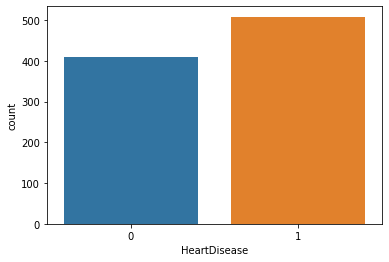

In [ ]:
seaborn.countplot(df['HeartDisease'])

In [ ]:
df.isnull()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isna().sum()

Age             0
RestingBP       0
Cholesterol     0
FastingBS       0
MaxHR           0
Oldpeak         0
HeartDisease    0
dtype: int64

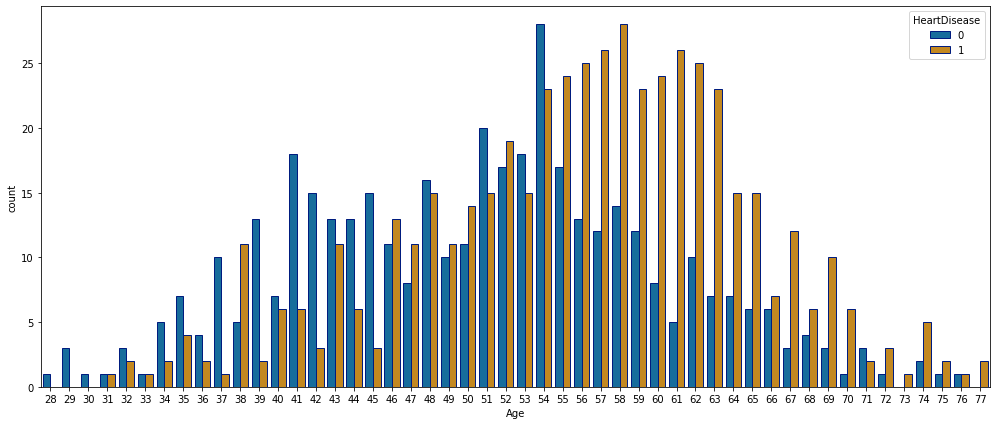

In [ ]:
plt.figure(figsize=(17,7))
seaborn.countplot(x='Age',hue='HeartDisease',data=df,palette='colorblind',edgecolor=seaborn.color_palette('dark',n_colors=1))

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [ ]:
x=df.iloc[:,:-1] #remove class atribute

In [ ]:
x

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0
...,...,...,...,...,...,...
913,45,110,264,0,132,1.2
914,68,144,193,1,141,3.4
915,57,130,131,0,115,1.2
916,57,130,236,0,174,0.0


In [ ]:
y=df.iloc[:,6] #set target column

In [ ]:
y

0      N
1      N
2      N
3      Y
4      N
      ..
913    N
914    N
915    Y
916    N
917    N
Name: ExerciseAngina, Length: 918, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.10,random_state=1)

In [ ]:
xtrain

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
201,46,120,230,0,150,0.0
331,56,115,0,1,82,-1.0
268,54,130,242,0,91,1.0
59,52,112,342,0,96,1.0
649,50,144,200,0,126,0.9
...,...,...,...,...,...,...
767,54,108,267,0,167,0.0
72,52,120,182,0,150,0.0
908,63,140,187,0,144,4.0
235,39,120,200,0,160,1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Rclf=RandomForestClassifier()  #create object

In [ ]:
Rclf.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
Rclf.score(xtest,ytest)

0.7608695652173914

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Clf=DecisionTreeClassifier()

In [ ]:
Clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
Clf.score(xtest,ytest)

0.717391304347826

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neighbors_settings=range(1,26) #KNN 25 times
for n_neighbors in neighbors_settings:
  knn=KNeighborsClassifier(n_neighbors=n_neighbors)
  knn.fit(xtrain,ytrain)

In [ ]:
knn.score(xtest,ytest)

0.6847826086956522

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop(['HeartDisease'], axis = 1)
y = df['HeartDisease']

In [ ]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0
...,...,...,...,...,...,...
913,45,110,264,0,132,1.2
914,68,144,193,1,141,3.4
915,57,130,131,0,115,1.2
916,57,130,236,0,174,0.0


In [ ]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [ ]:
std = StandardScaler()
X_scaled = std.fit_transform(X)

In [ ]:
X_train_s, X_test_s, y_train, y_test = train_test_split(X_scaled, y)

In [ ]:
lr_stock = LogisticRegression()
lr_stock.fit(X_train_s, y_train)

LogisticRegression()

In [ ]:
lr_stock.score(X_test_s, y_test)

0.7608695652173914

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
logistic_regression_grid = {
    'C': np.logspace(-4,4,20),
    'solver': ['liblinear']
}

rs_logistic_regression = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions = logistic_regression_grid,
    cv = 5,
    n_iter = 20,
    verbose = True,
    n_jobs = -1
)

# Fit the random hyperparameter search for logistic regression
rs_logistic_regression.fit(X_train_s, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
# check the best hyperparameters
rs_logistic_regression.best_params_

{'C': 0.004832930238571752, 'solver': 'liblinear'}

In [ ]:
# evaluate the model on the test data using the score method
rs_logistic_regression.score(X_test_s, y_test)

0.7782608695652173